# Predicting whether a tumor is benign or  malignant

So its 2021-01-28,
Thinking of creating a project related to it some prediction, this is the first time i'm working on a famous data set that is **Breast Cancer Wisconsin (Original) Data Set**  which you can find [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29).

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
worst/largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 0 is Mean Radius, field
10 is Radius SE, field 20 is Worst Radius.

- class:
    - WDBC-Malignant (0)
    - WDBC-Benign(1)

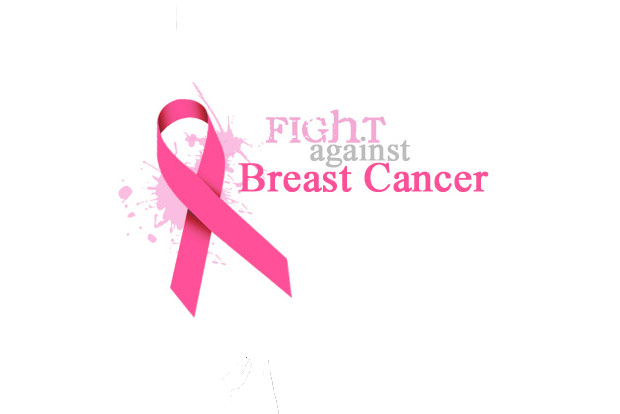

**Our goal is to predict whether a tumor is benign or malignant, we have to predict the class of tumor** and we know that it is dependent on all other parameters which are specified above:

Since we want to predict a class which depends on other parameters we are going to use **Classification algorithms**.


## Step-1: Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step-2:  Importing the dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
print(cancer['target_names'])

['malignant' 'benign']


In [8]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
cancer['data'].shape

(569, 30)

In [36]:
# Combining for creating a data frame 
df_cancer=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [11]:
# getting the First 5 rows of the dataset
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
# Fetching the bottom 5 rows
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [13]:
df_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

So as we can see there is no missing values in our dataset

## Step -3: Visualising the dataset 

### Creating pair-plot for comparing malignant and benign class 

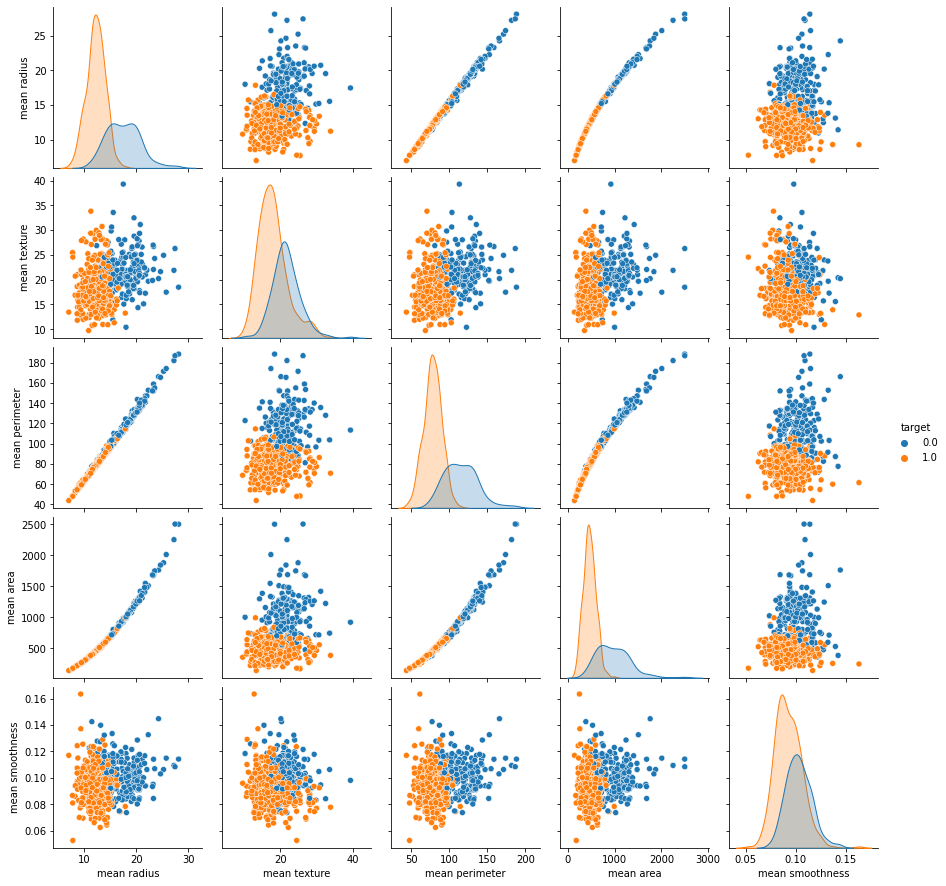

In [14]:
sns.pairplot(df_cancer,hue='target',vars=['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'])

<AxesSubplot:xlabel='target', ylabel='count'>

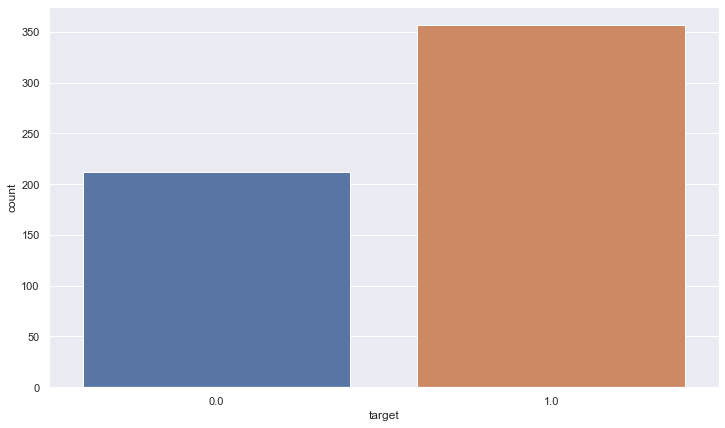

In [15]:
# Count plot for two classes
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.countplot(x="target", data=df_cancer)

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

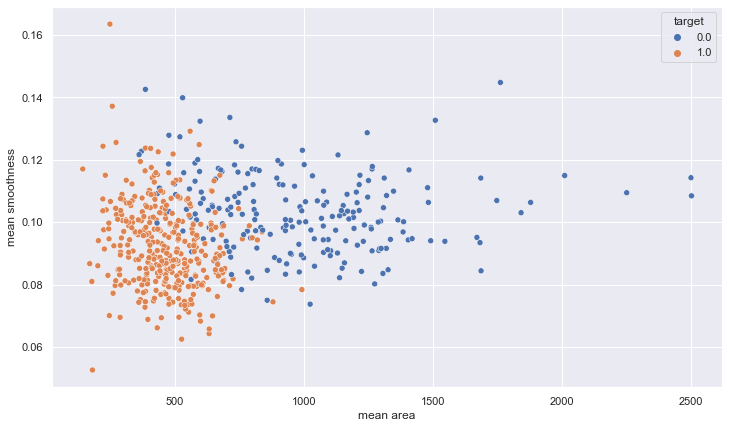

In [16]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='mean area',y='mean smoothness',hue='target',data=df_cancer)

<AxesSubplot:>

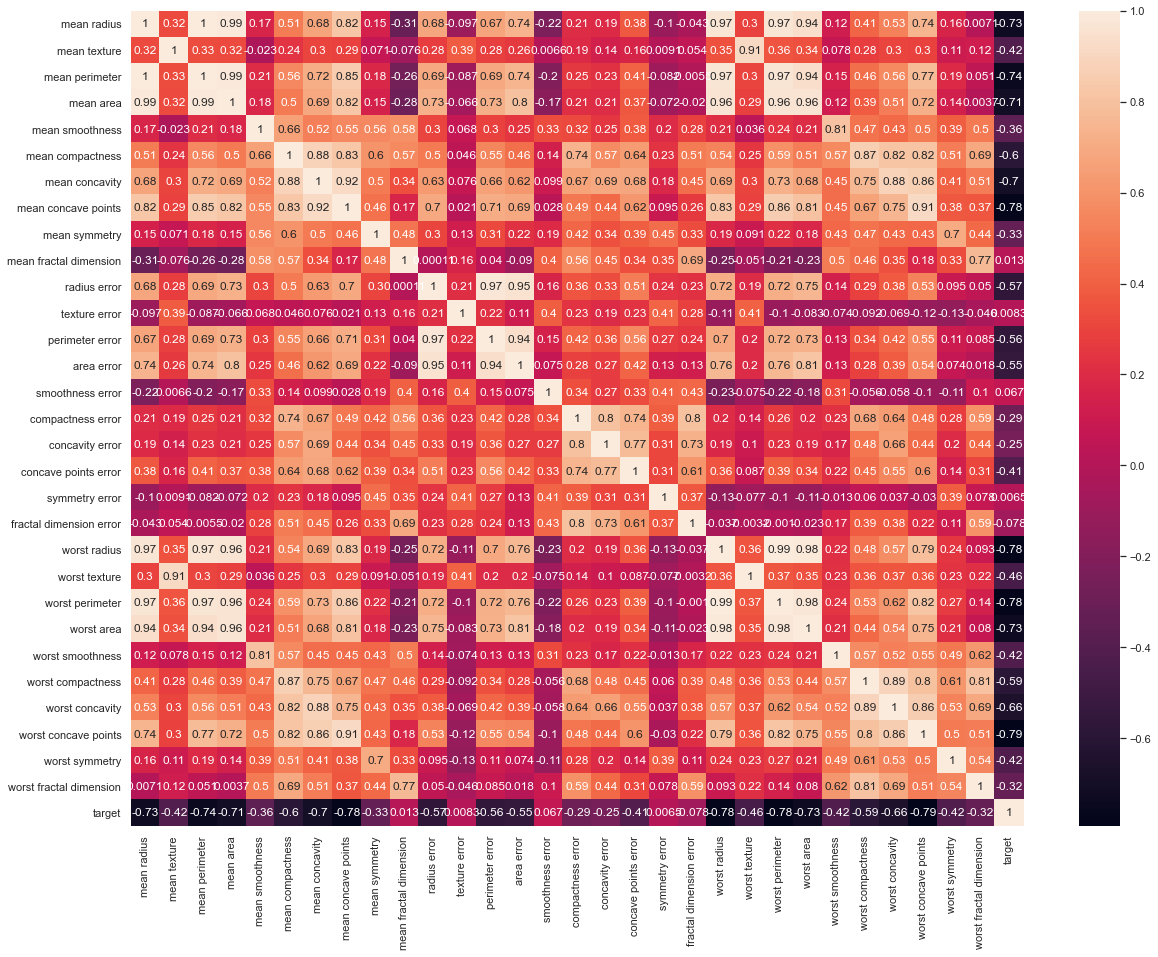

In [17]:
# Creating heat map for knowing how things are related to each other 
plt.figure(figsize=(20,15))
sns.heatmap(df_cancer.corr(),annot=True)

## Step- 4: Model training (Finding the problem solution)

In [18]:
# seperating features and target
x=df_cancer.iloc[:,0:-1].values
y=df_cancer.iloc[:,-1].values

In [19]:
# printing first 5 rows of the arrays
print(x[:5],'\n','-'*50)
print(y[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [20]:
# reshaping y
y=y.reshape(len(y),1)
y[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

## Step -5: Training our model

In [21]:
# splitting the dataset 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

In [22]:
# printing first 5 rows of training and test dataset
print(x_train[:5],'\n','-'*75)
print(x_test[:5],'\n','-'*75)
print(y_train[:5],'\n','-'*75)
print(y_test[:5])

[[1.320e+01 1.582e+01 8.407e+01 5.373e+02 8.511e-02 5.251e-02 1.461e-03
  3.261e-03 1.632e-01 5.894e-02 1.903e-01 5.735e-01 1.204e+00 1.550e+01
  3.632e-03 7.861e-03 1.128e-03 2.386e-03 1.344e-02 2.585e-03 1.441e+01
  2.045e+01 9.200e+01 6.369e+02 1.128e-01 1.346e-01 1.120e-02 2.500e-02
  2.651e-01 8.385e-02]
 [1.136e+01 1.757e+01 7.249e+01 3.998e+02 8.858e-02 5.313e-02 2.783e-02
  2.100e-02 1.601e-01 5.913e-02 1.916e-01 1.555e+00 1.359e+00 1.366e+01
  5.391e-03 9.947e-03 1.163e-02 5.872e-03 1.341e-02 1.659e-03 1.305e+01
  3.632e+01 8.507e+01 5.213e+02 1.453e-01 1.622e-01 1.811e-01 8.698e-02
  2.973e-01 7.745e-02]
 [1.808e+01 2.184e+01 1.174e+02 1.024e+03 7.371e-02 8.642e-02 1.103e-01
  5.778e-02 1.770e-01 5.340e-02 6.362e-01 1.305e+00 4.312e+00 7.636e+01
  5.530e-03 5.296e-02 6.110e-02 1.444e-02 2.140e-02 5.036e-03 1.976e+01
  2.470e+01 1.291e+02 1.228e+03 8.822e-02 1.963e-01 2.535e-01 9.181e-02
  2.369e-01 6.558e-02]
 [1.057e+01 2.022e+01 7.015e+01 3.383e+02 9.073e-02 1.660e-01 2.280

###  Using Support vector machine Classification algoritms

In [23]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train, y_train.reshape(len(y_train,)))

SVC()

## Step -6 :Evaluating the performance of the model 

In [24]:
# Using predict function for predicting the results 
y_pred_svm=svm_clf.predict(x_test)
y_pred_svm

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [25]:
# Creating confusion matrix 
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred_svm)
cm

array([[41,  7],
       [ 0, 66]], dtype=int64)

<AxesSubplot:>

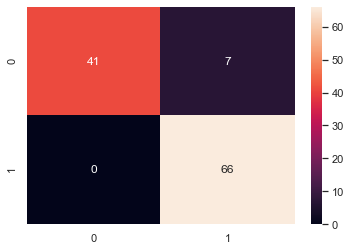

In [26]:
sns.heatmap(cm,annot=True)

In [37]:
accuracy_score(y_test,y_pred_svm)

0.9385964912280702

### Conclusions

- As we can see our model has made 7 incorrect predictions and accuracy for our model is 93%.                             
**For increasing the performance of our model**
- We will do feature scaling and will also do parameter tuning for svm model.

## Step -6: Feature Scaling

In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
print(x_train[:5],'\n','-'*75)
print(x_test[:5],'\n','-'*75)
print(y_train[:5],'\n','-'*75)
print(y_test[:5])

[[-0.25014735 -0.76796585 -0.31169473 -0.32408078 -0.79967682 -0.97836404
  -1.09314572 -1.18103062 -0.63919915 -0.5321841  -0.79123655 -1.13484464
  -0.85158565 -0.57863566 -1.10984991 -0.96449158 -1.02821823 -1.52573684
  -0.85171144 -0.43115625 -0.37136482 -0.80781005 -0.44341627 -0.42370734
  -0.86568953 -0.74854299 -1.26589317 -1.36032957 -0.38766321  0.02350022]
 [-0.7831845  -0.35579205 -0.79945921 -0.72813549 -0.55263147 -0.96614459
  -0.74913144 -0.7088435  -0.75326676 -0.50451652 -0.78625806  0.62050202
  -0.76850269 -0.62429516 -0.53669762 -0.84585872 -0.66461935 -0.94492417
  -0.85533197 -0.77260877 -0.66342427  1.80403026 -0.65898546 -0.64070796
   0.5948537  -0.56466641 -0.41207115 -0.38997167  0.16066118 -0.33873063]
 [ 1.16355985  0.64991203  1.09220769  1.10612597 -1.61129556 -0.31003912
   0.32678563  0.27018814 -0.1314143  -1.33891255  0.91638561  0.17339385
   0.81436166  0.93160191 -0.49140588  1.60033277  1.04812452  0.4826154
   0.10893757  0.47262361  0.7775455 

In [29]:
svm_clf.fit(x_train,y_train)
y_pred_scaled=svm_clf.predict(x_test)
y_pred_scaled

c:\users\pankaj moulekhi\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

In [30]:
cm1=confusion_matrix(y_test,y_pred_scaled)
cm1

array([[45,  3],
       [ 1, 65]], dtype=int64)

In [31]:
params_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(),params_grid,refit=True,verbose=4)
grid.fit(x_train,y_train.reshape(455,))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [32]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [33]:
y_pred_grid=grid.predict(x_test)
y_pred_grid

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

In [34]:
cm1=confusion_matrix(y_test,y_pred_grid)
cm1

array([[45,  3],
       [ 1, 65]], dtype=int64)

<AxesSubplot:>

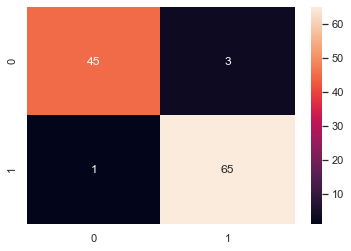

In [35]:
sns.heatmap(cm1,annot=True)

In [38]:
accuracy_score(y_test,y_pred_grid)

0.9649122807017544

### Conclusion 

- Now the accuracy of our model is 96.49% which is very good and now it can make better predictions for benign and melignant class.